In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = SettingWithCopyWarning)

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')

## Plan for today
1. check the dtypes
2. spot the missing values
3. describe numerical
4. value counts for categorical
5. visualize distributions
6. check for correlations

# Checking the dtypes. 
1. All dtypes are numeric
2. TypeOfSteel_A300, TypeOfSteel_A400 are one-hot-encoded labels
2. Target values are one-hot-encoded labels

In [4]:
train.dtypes

id                         int64
X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch  

# Missing values
No missing values in train and test

In [5]:
train.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [6]:
test.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

# Stats
1. Describe
2. Let's have a look at the target value labels' counts
3. Let's visualize the basic stats using boxplot 
4. Let's check the distribution using ridgeplot


In [7]:
train.describe()

id     X_Minimum     X_Maximum     Y_Minimum     Y_Maximum  \
count  19219.000000  19219.000000  19219.000000  1.921900e+04  1.921900e+04   
mean    9609.000000    709.854675    753.857641  1.849756e+06  1.846605e+06   
std     5548.191747    531.544189    499.836603  1.903554e+06  1.896295e+06   
min        0.000000      0.000000      4.000000  6.712000e+03  6.724000e+03   
25%     4804.500000     49.000000    214.000000  6.574680e+05  6.575020e+05   
50%     9609.000000    777.000000    796.000000  1.398169e+06  1.398179e+06   
75%    14413.500000   1152.000000   1165.000000  2.368032e+06  2.362511e+06   
max    19218.000000   1705.000000   1713.000000  1.298766e+07  1.298769e+07   

        Pixels_Areas   X_Perimeter   Y_Perimeter  Sum_of_Luminosity  \
count   19219.000000  19219.000000  19219.000000       1.921900e+04   
mean     1683.987616     95.654665     64.124096       1.918467e+05   
std      3730.319865    177.821382    101.054178       4.420247e+05   
min         6.000000      2.000000      1.000000       2.500000e+02   
25%        89.000000     15.000000     14.000000       9.848000e+03   
50%       168.000000     25.000000     23.000000       1.823800e+04   
75%       653.000000     64.000000     61.000000       6.797800e+04   
max    152655.000000   7553.000000    903.000000       1.159141e+07   

       Minimum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
count           19219.000000  ...       19219.000000      19219.000000   
mean               84.808419  ...           0.102742         -0.138382   
std                28.800344  ...           0.487681          0.120344   
min                 0.000000  ...          -0.988400         -0.885000   
25%                70.000000  ...          -0.272700         -0.192500   
50%                90.000000  ...           0.111100         -0.142600   
75%               105.000000  ...           0.529400         -0.084000   
max               196.000000  ...           0.991700          0.642100   

       SigmoidOfAreas        Pastry     Z_Scratch      K_Scatch        Stains  \
count    19219.000000  19219.000000  19219.000000  19219.000000  19219.000000   
mean         0.571902      0.076279      0.059837      0.178573      0.029554   
std          0.332219      0.265450      0.237190      0.383005      0.169358   
min          0.119000      0.000000      0.000000      0.000000      0.000000   
25%          0.253200      0.000000      0.000000      0.000000      0.000000   
50%          0.472900      0.000000      0.000000      0.000000      0.000000   
75%          0.999400      0.000000      0.000000      0.000000      0.000000   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

          Dirtiness         Bumps  Other_Faults  
count  19219.000000  19219.000000  19219.000000  
mean       0.025235      0.247828      0.341225  
std        0.156844      0.431762      0.474133  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      1.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 35 columns]

In [8]:
train.head()

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0        584        590     909972     909977            16            8   
1   1        808        816     728350     728372           433           20   
2   2         39        192    2212076    2212144         11388          705   
3   3        781        789    3353146    3353173           210           16   
4   4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  ...  \
0            5               2274                    113  ...   
1           54              44478                     70  ...   
2          420            1311391                     29  ...   
3           29               3202                    114  ...   
4           67              48231                     82  ...   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  \
0            -0.5000           -0.0104          0.1417       0          0   
1             0.7419           -0.2997          0.9491       0          0   
2            -0.0105           -0.0944          1.0000       0          0   
3             0.6667           -0.0402          0.4025       0          0   
4             0.9158           -0.2455          0.9998       0          0   

   K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  
0         0       1          0      0             0  
1         0       0          0      0             1  
2         1       0          0      0             0  
3         1       0          0      0             0  
4         0       0          0      0             1  

[5 rows x 35 columns]

In [9]:
train.shape

(19219, 35)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
num_col = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']
target_col = ['Pastry', 'Z_Scratch','K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [12]:
target_df = train[target_col]
target_df['id'] = train['id']
target_df['label'] = target_df[target_col].apply(lambda x: '_'.join(x.index[x==1].tolist()), axis=1)

In [13]:
target_df['label'] = target_df['label'].replace('', 'None')

# Value counts of target variable

In [14]:
target_df['label'].value_counts()

label
Other_Faults             6540
Bumps                    4761
K_Scatch                 3411
Pastry                   1465
Z_Scratch                1150
None                      818
Stains                    568
Dirtiness                 485
K_Scatch_Other_Faults      18
K_Scatch_Bumps              2
Pastry_K_Scatch             1
Name: count, dtype: int64

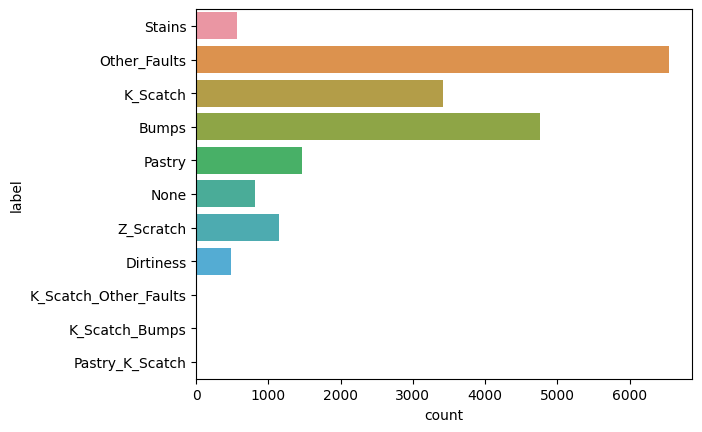

In [15]:
sns.countplot(data = target_df, y = 'label')
plt.show()

In [16]:
train['label'] = target_df['label']

In [17]:
joy_df = train.drop(train[train['label']=='Pastry_K_Scatch'].index)

# Histograms

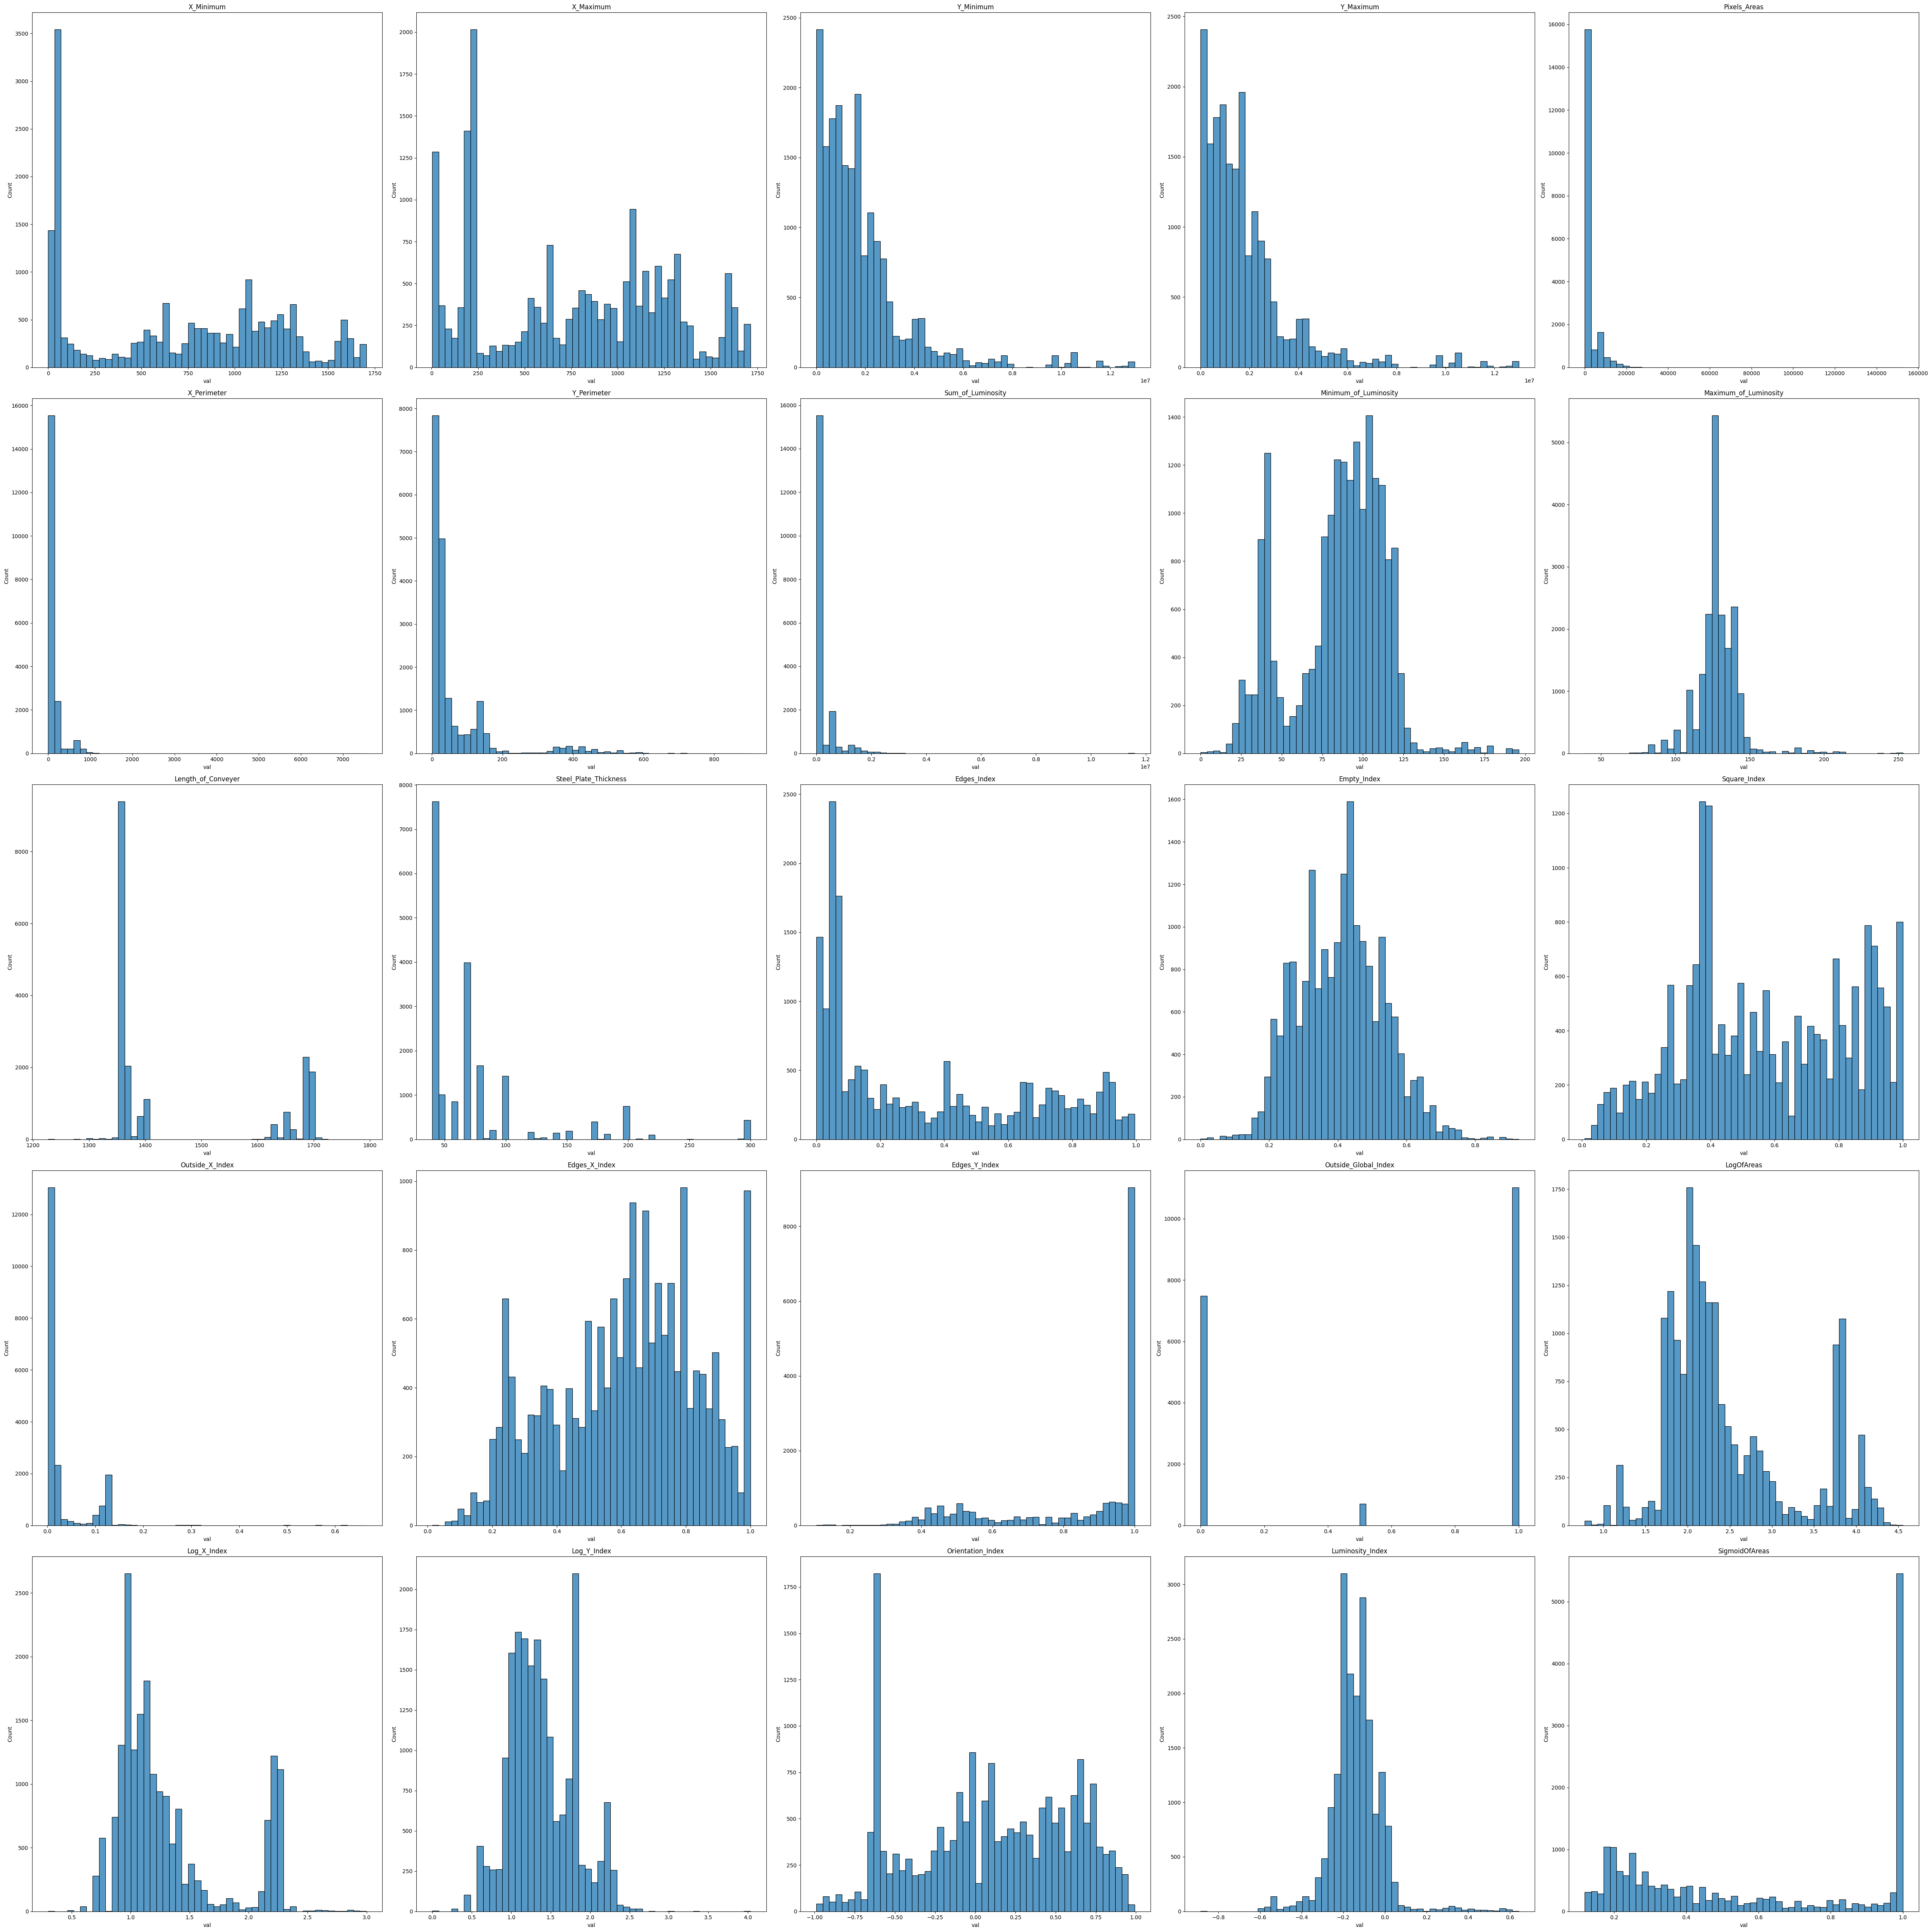

<Figure size 640x480 with 0 Axes>

In [18]:
fig, axs = plt.subplots(5,5, figsize=(50, 50))
axs = axs.flatten()

for i, col in enumerate(num_col):
    sns.histplot(data=train, x=col, ax=axs[i], bins = 50)
    axs[i].set_title(col)
    axs[i].set_xlabel('val')

plt.tight_layout()
plt.show()
plt.savefig('histplot_dist.png', dpi=150)

# Boxplots
The boxplots show some features with numerous outliers. 

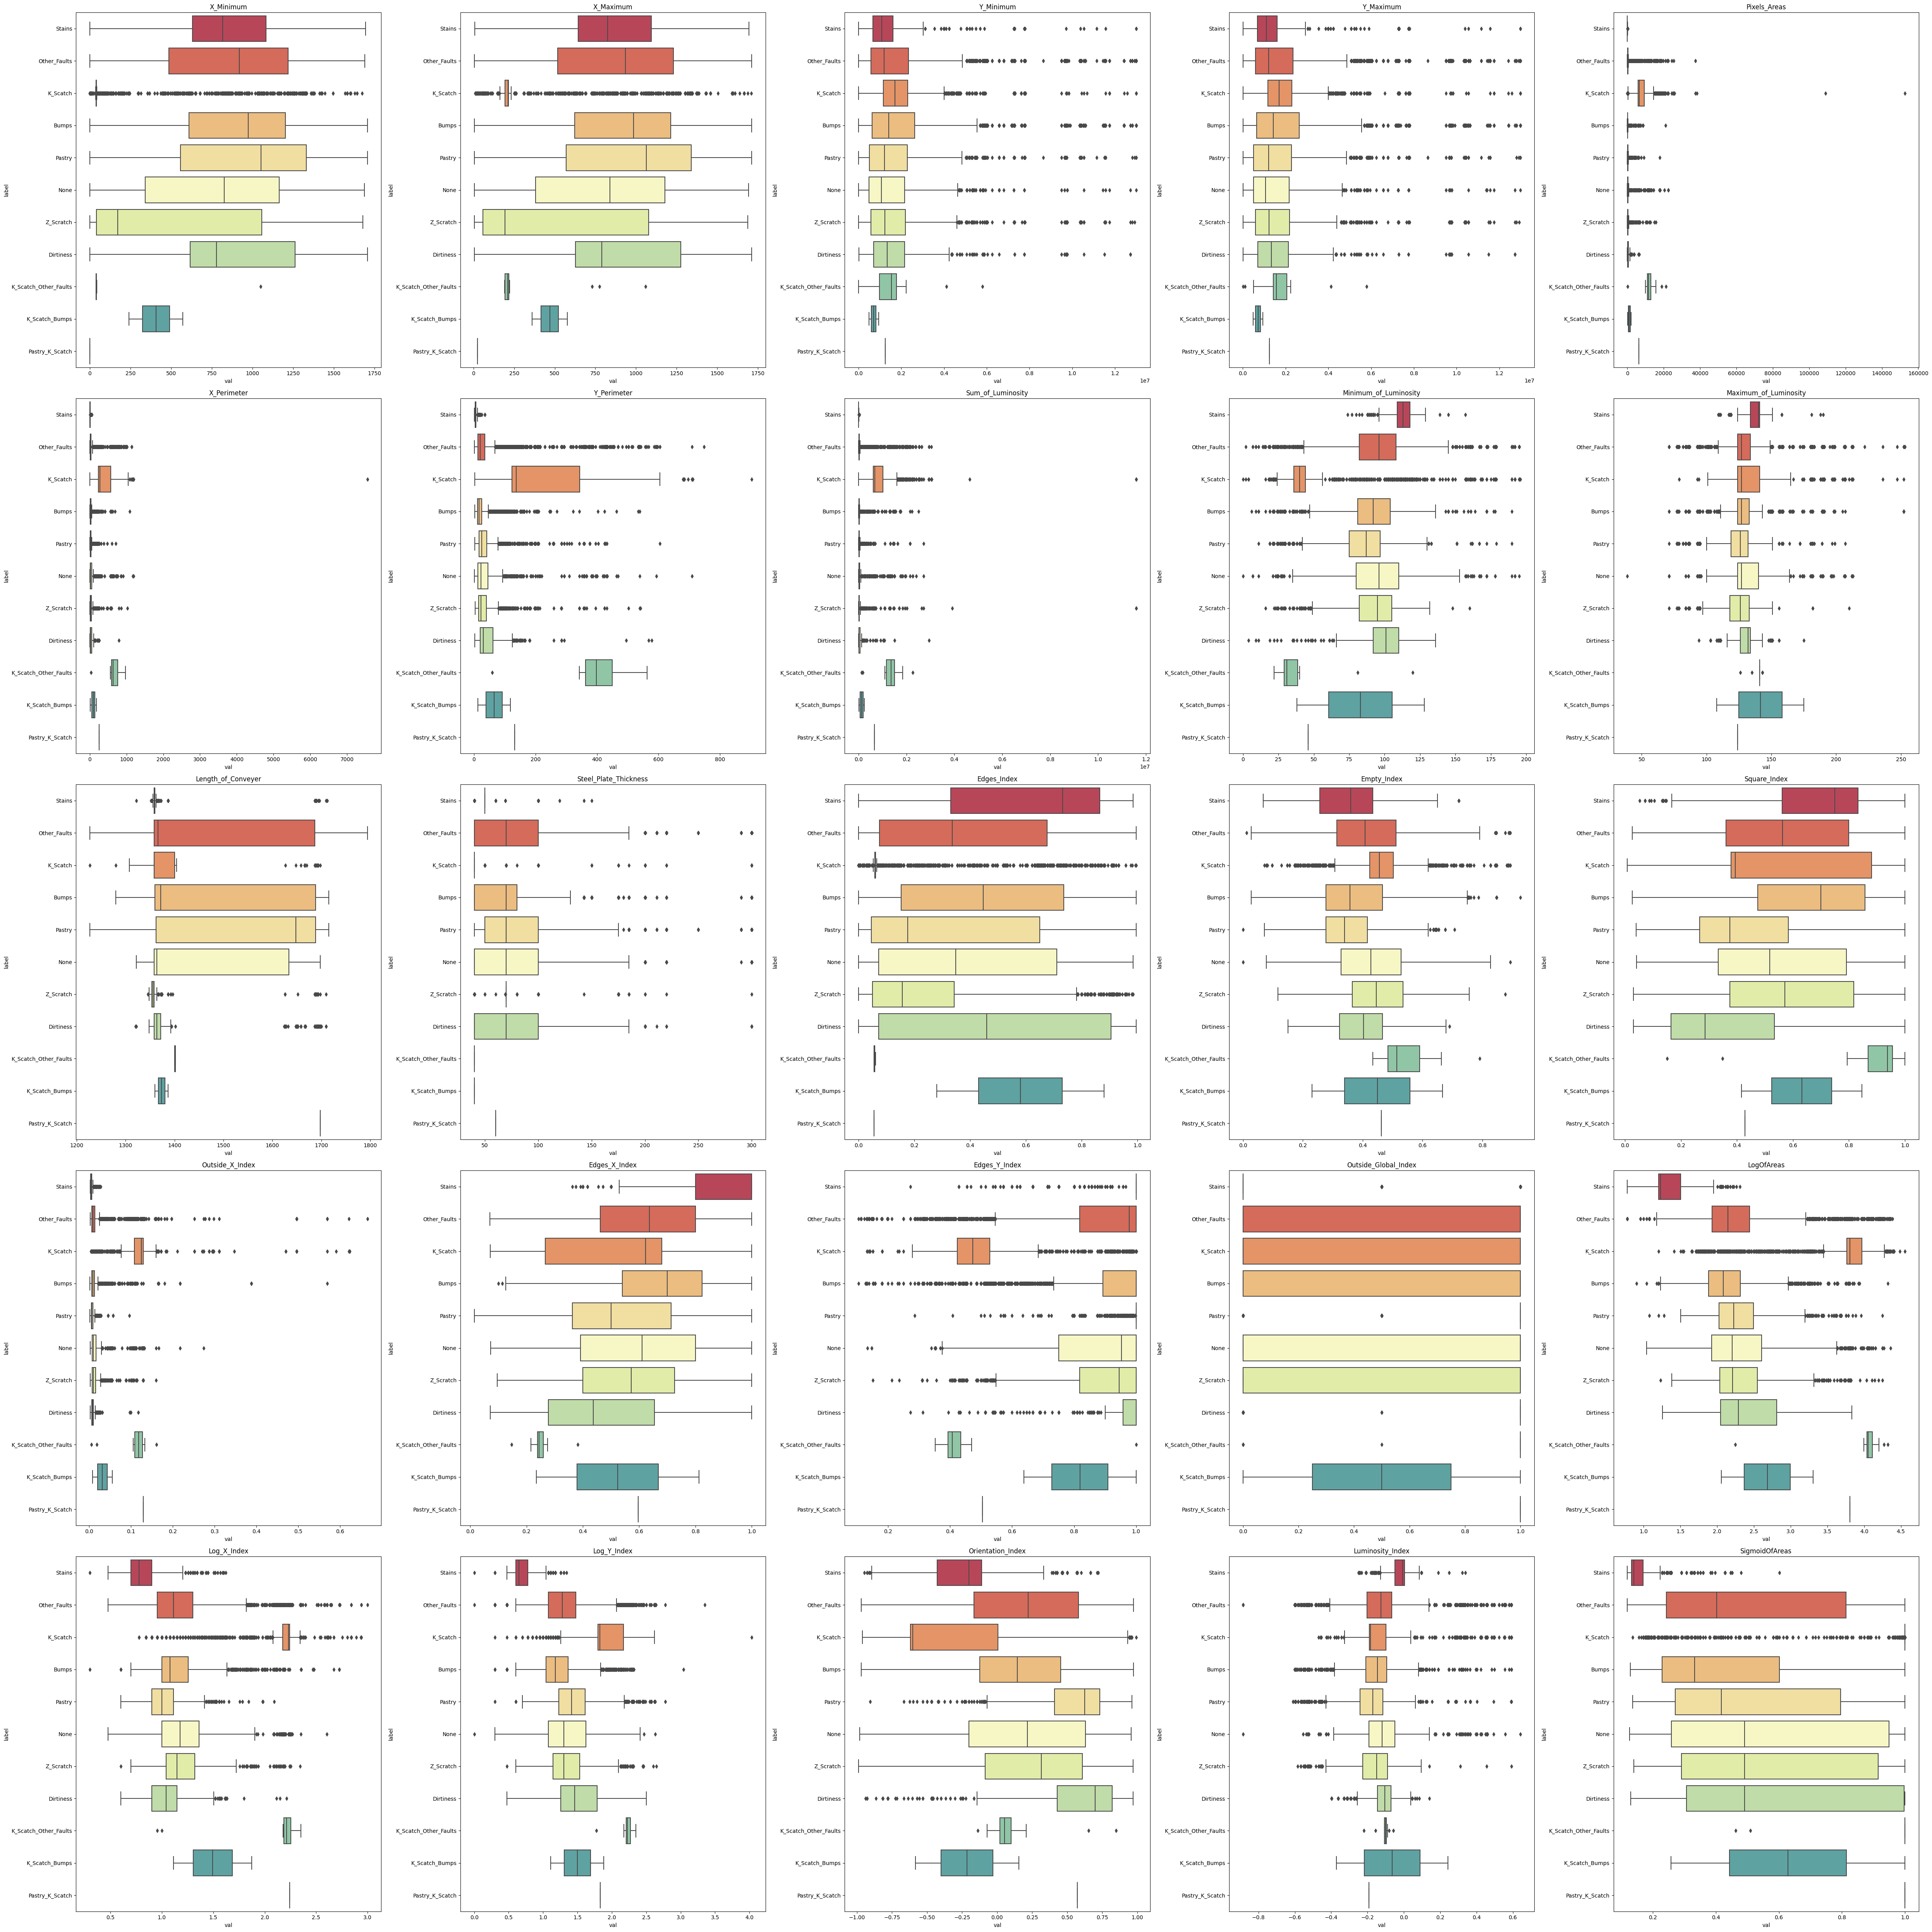

<Figure size 640x480 with 0 Axes>

In [19]:
fig, axs = plt.subplots(5,5, figsize=(50, 50))
axs = axs.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(data=train, x=col, ax=axs[i], y = 'label',palette = 'Spectral')
    axs[i].set_title(col)
    axs[i].set_xlabel('val')

plt.tight_layout()
plt.show()
plt.savefig('boxplot_dist.png', dpi=150)

In [20]:
%pip install joypy
import joypy  
from matplotlib import cm

Note: you may need to restart the kernel to use updated packages.


# Joyplots
Joyplots reveal that there are some features that could benefit from transformation and binning.

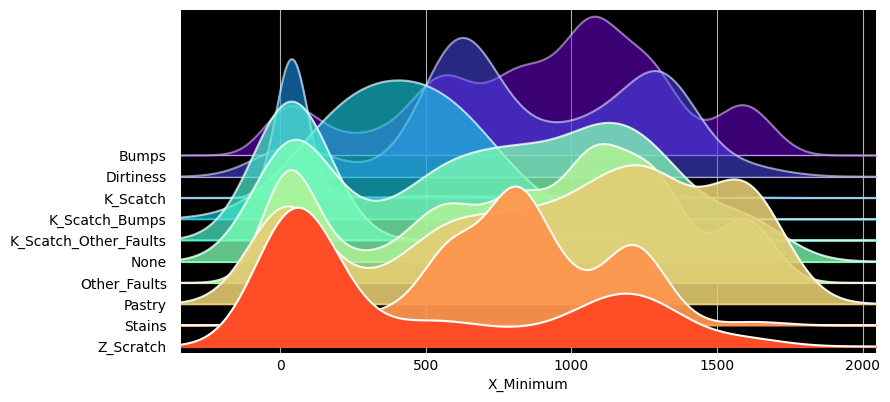

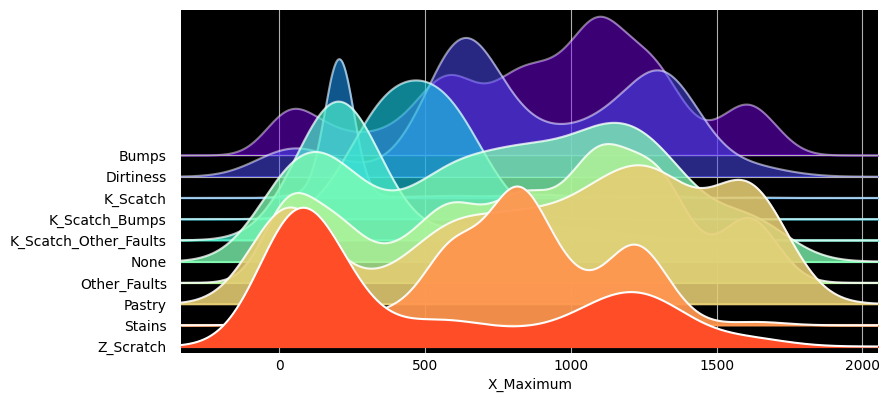

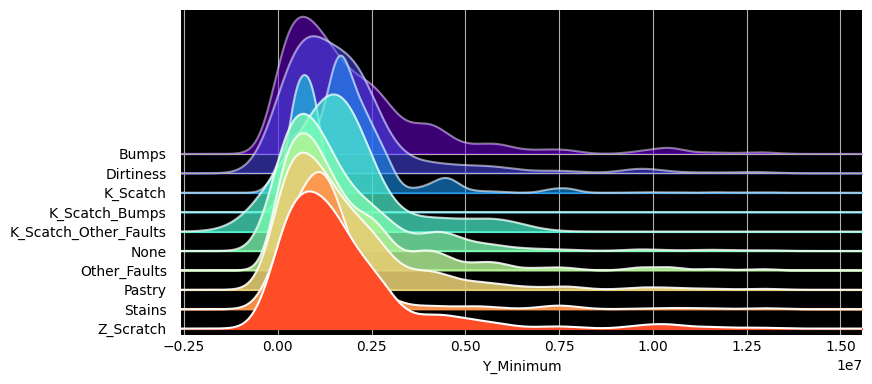

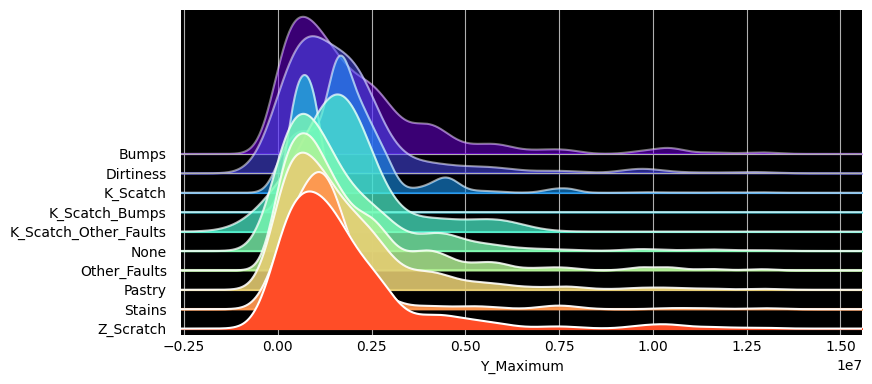

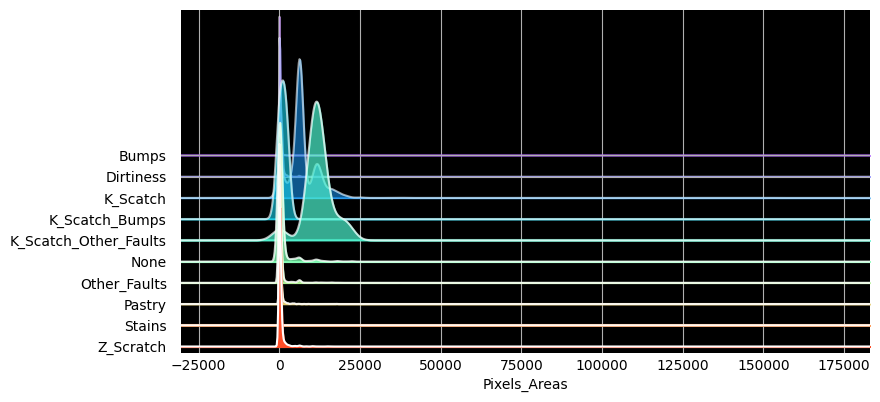

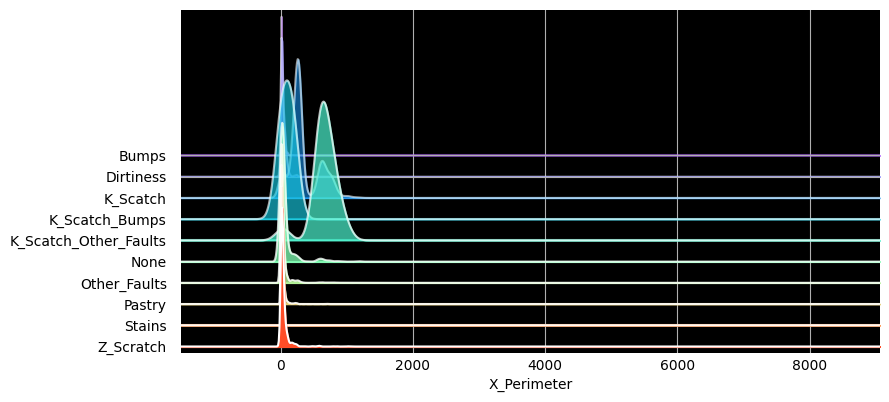

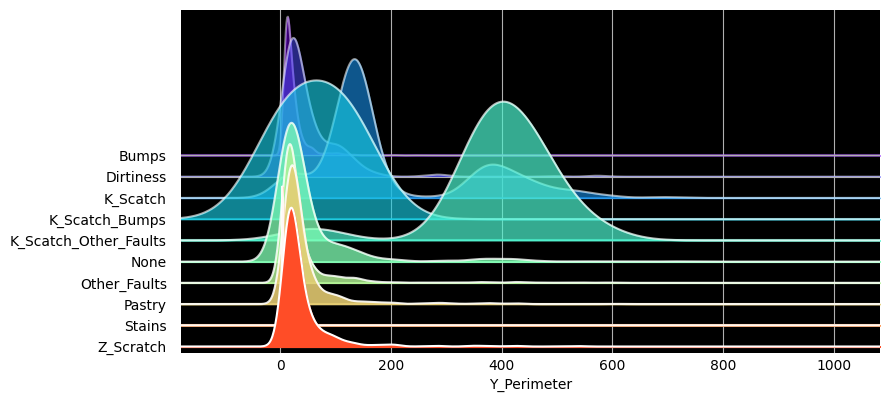

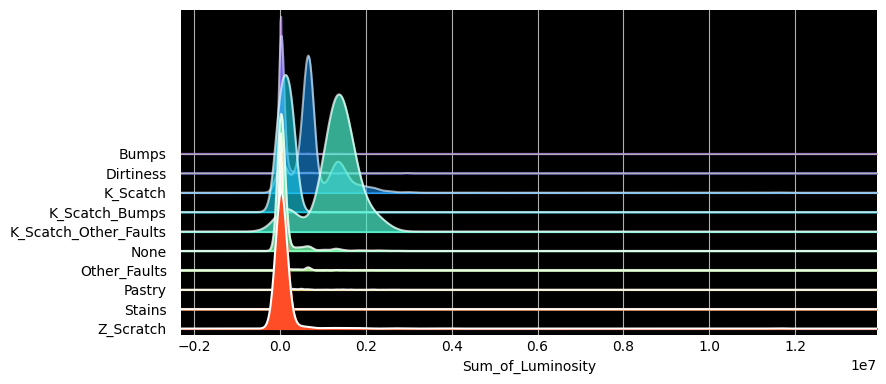

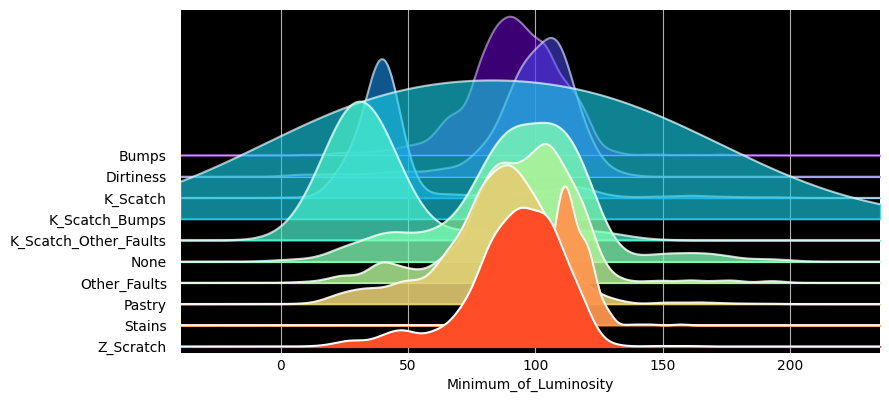

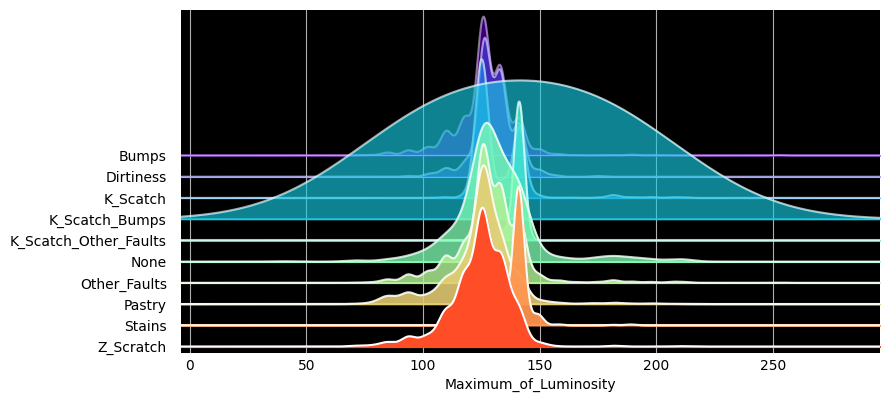

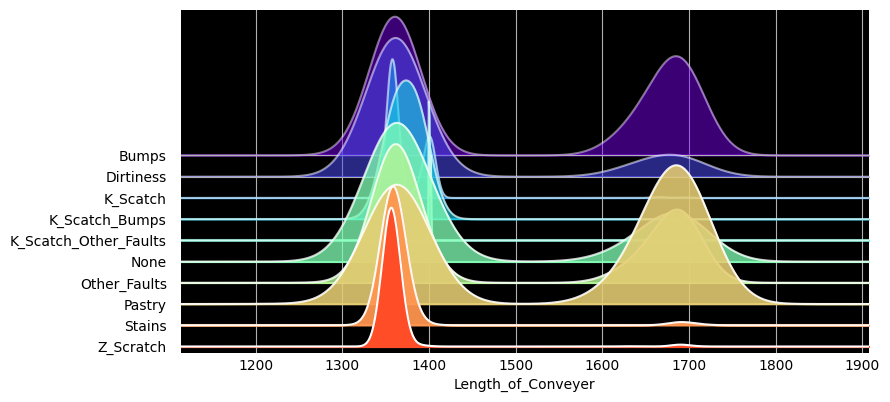

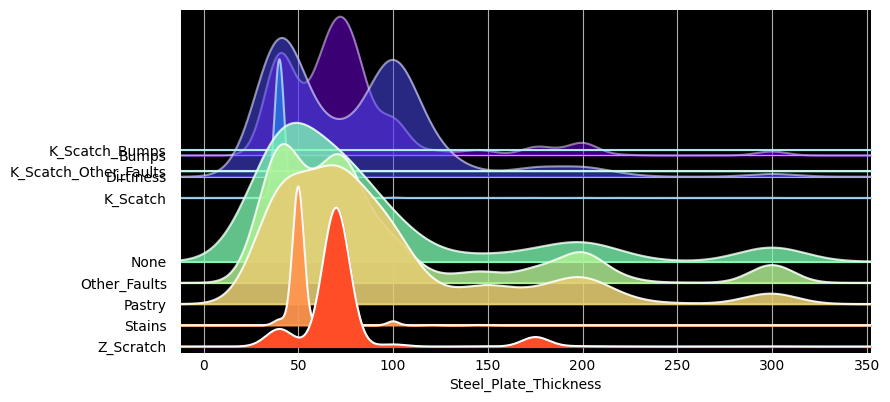

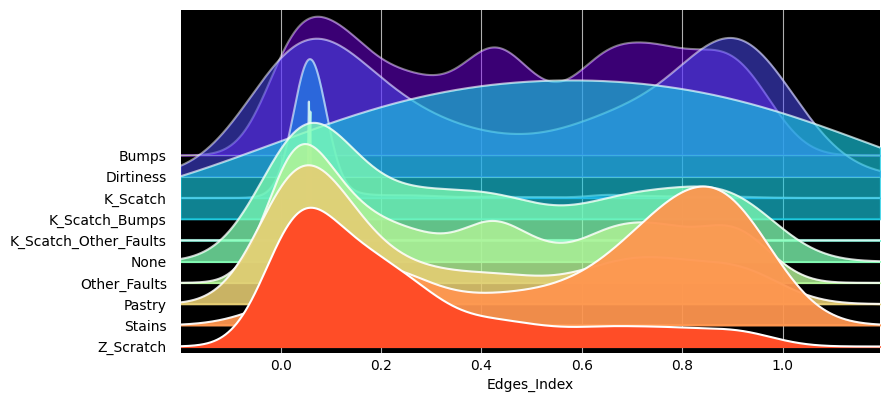

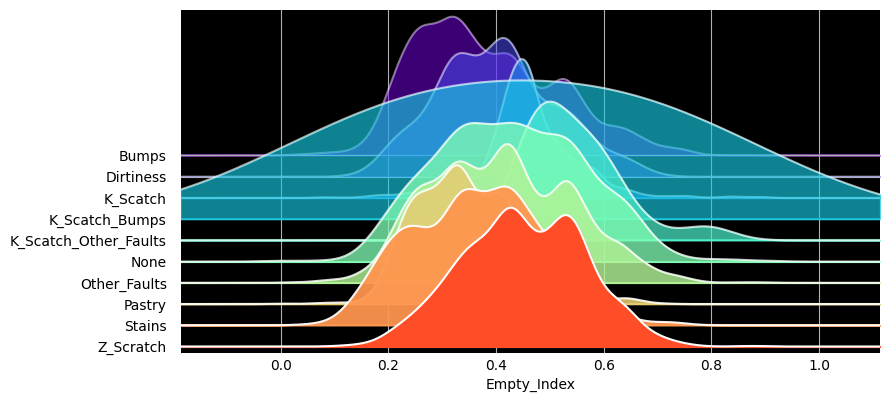

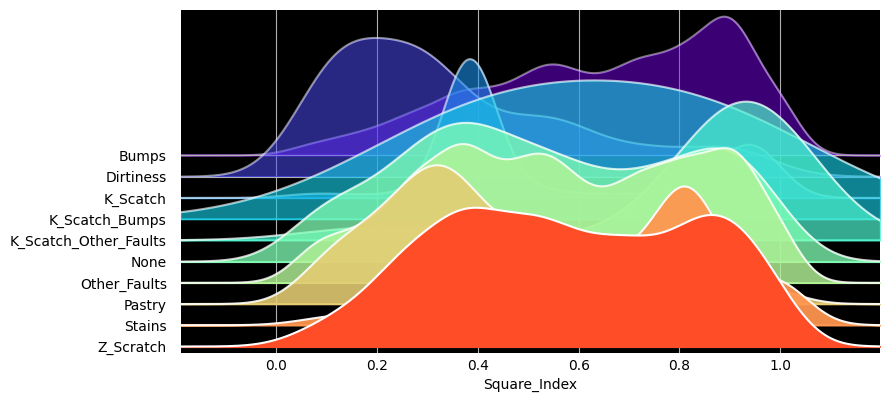

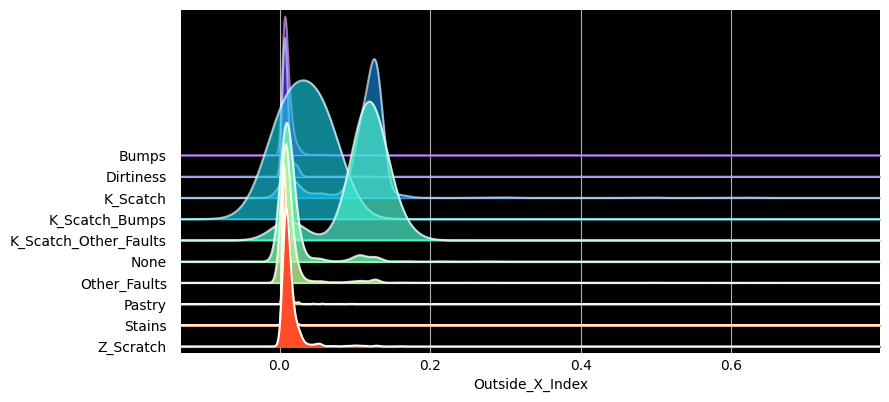

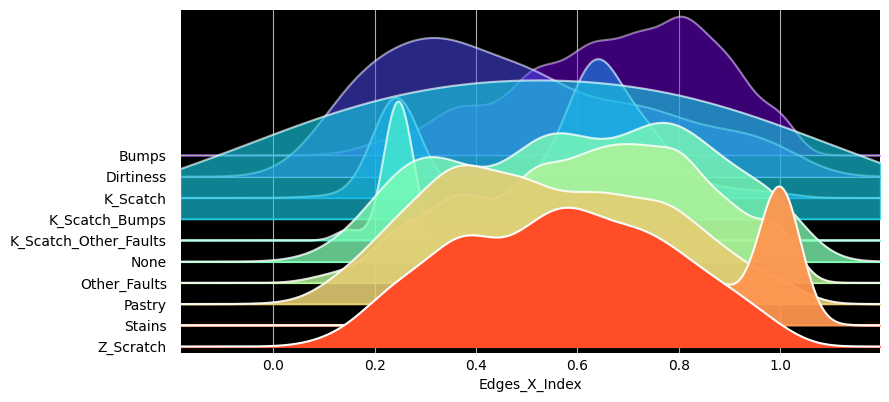

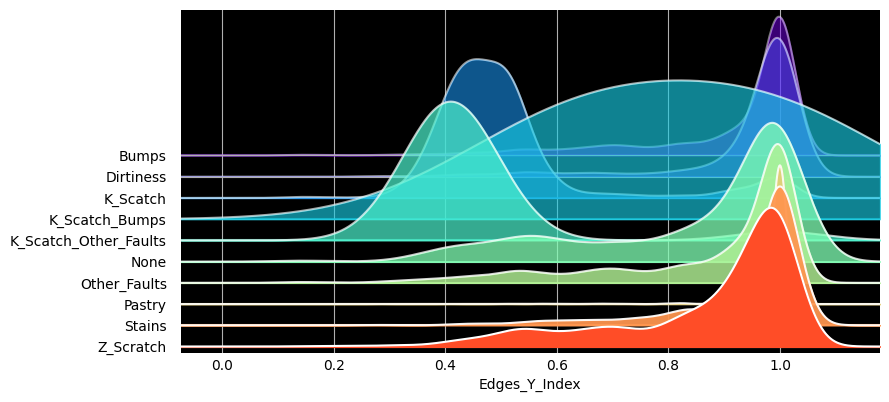

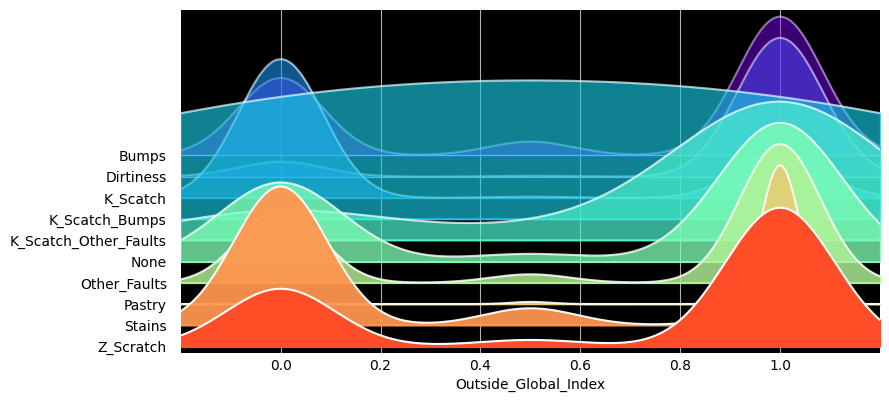

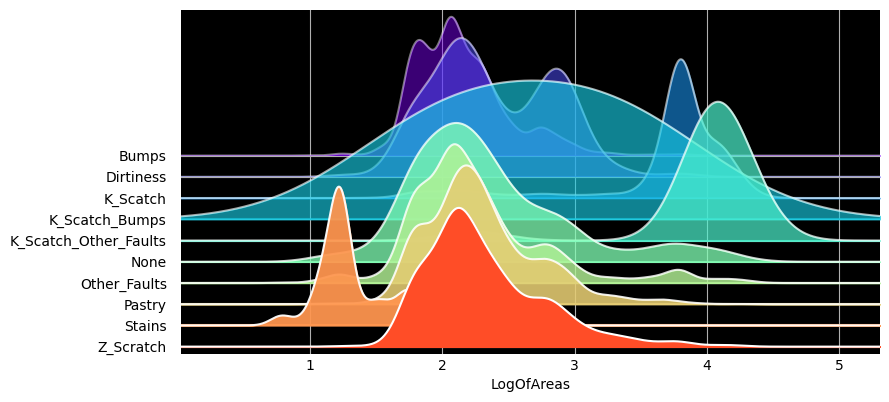

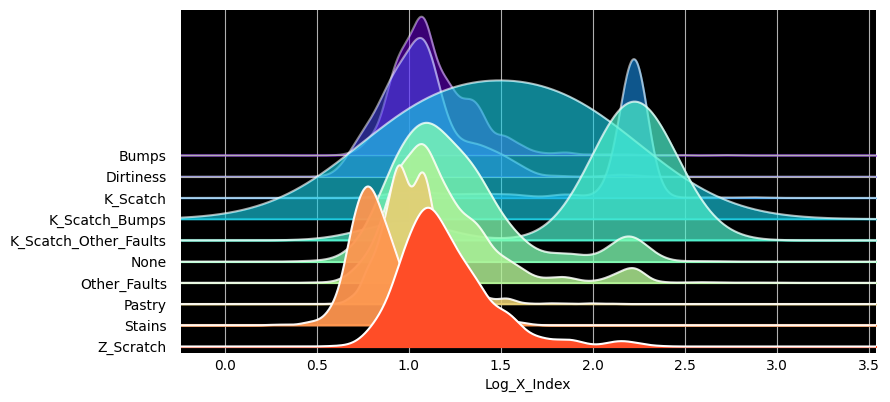

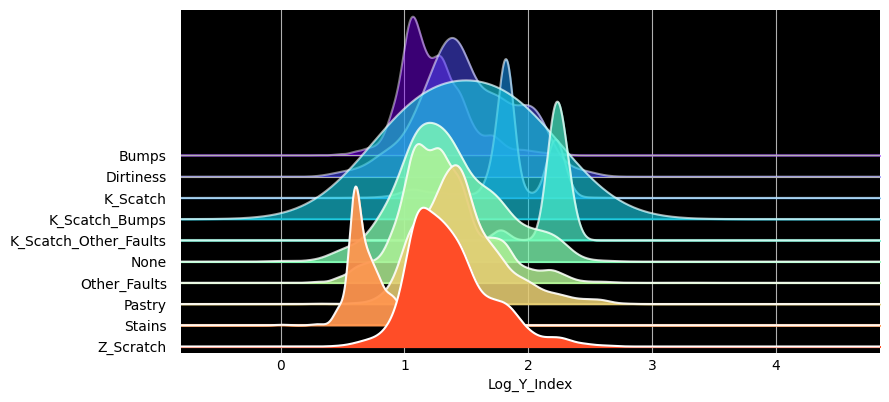

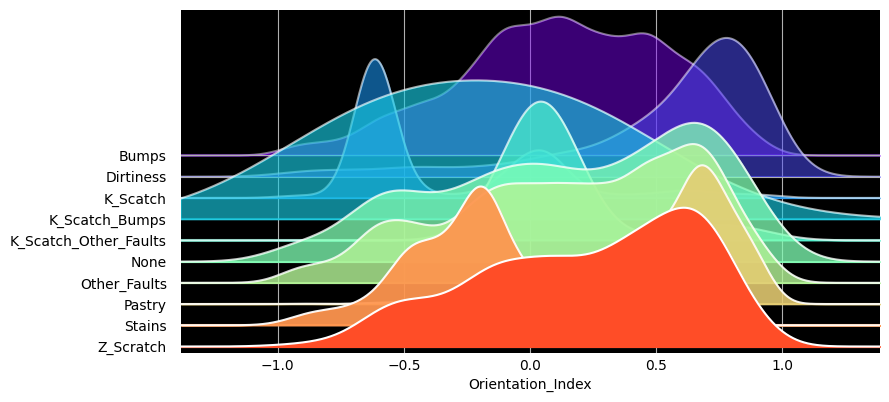

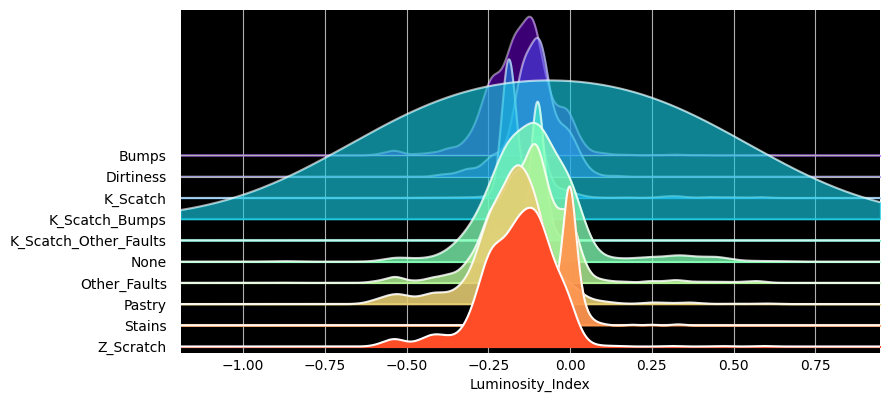

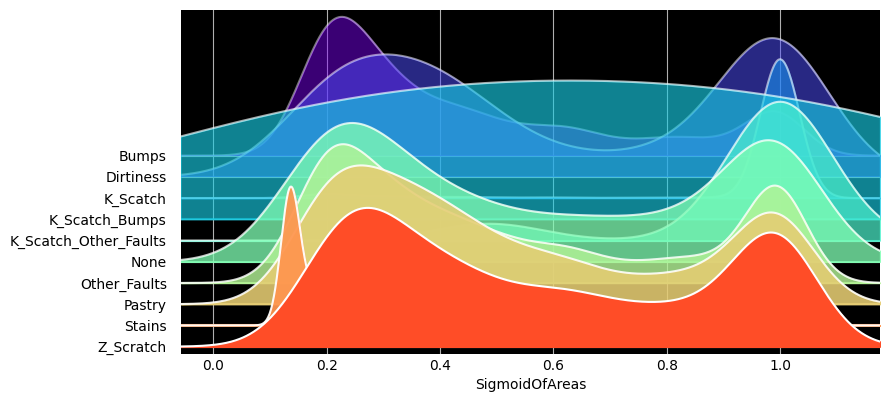

In [21]:
for col in num_col:
    joypy.joyplot(joy_df, column=col, by = 'label', xlim = 'own', ylim='own', grid='both', overlap = 2, colormap= cm.rainbow, fade=True, figsize=(9, 4), background = 'black', linecolor = 'white' )
    plt.xlabel(str(col))
    plt.show()




# Correlation
Thre are groups of features that are highly correlated. Removing some of them or engineering them might positively influence the results.

In [22]:
corr = train.drop(columns=['id','label']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

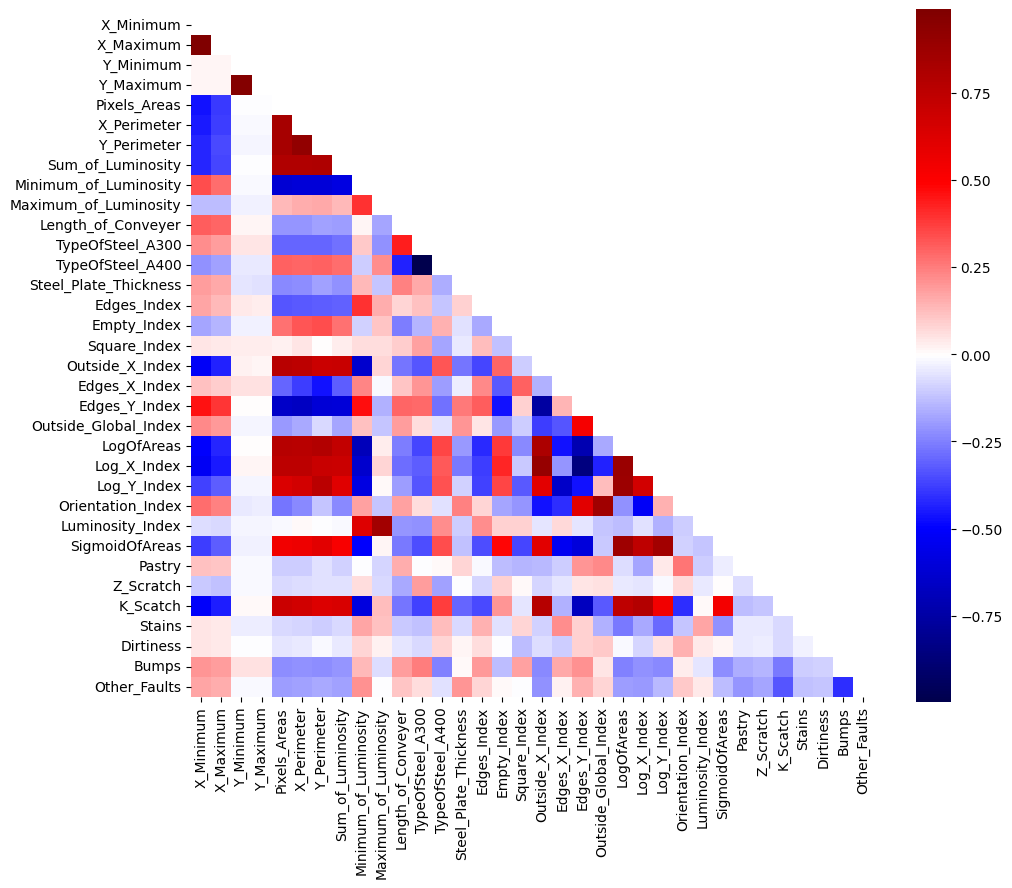

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data=corr, mask=mask, square=True, cmap='seismic')
plt.show()